# 📘 Covarianza

Este notebook explora el concepto de **covarianza**, su interpretación estadística, fórmulas para población y muestra, y ejemplos prácticos con datos simulados.

  ]


## Concepto de Covarianza

La **covarianza** mide el grado en que dos variables cambian juntas:
- Si es **positiva**, ambas tienden a aumentar o disminuir simultáneamente.
- Si es **negativa**, una aumenta mientras la otra disminuye.

Se representa como \( \text{Cov}(X, Y) \).

### Fórmulas

**Población:**  
$$\sigma_{xy} = \frac{\sum (x_i - \mu_x)(y_i - \mu_y)}{N}$$

**Muestra:**  
$$s_{xy} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{n - 1}$$

### 📌 Donde:
- \( x_i \), \( y_i \): valores individuales de X e Y  
- \( \mu_x \), \( \mu_y \): medias poblacionales  
- \( \bar{x} \), \( \bar{y} \): medias muestrales  
- \( N \): tamaño de la población  
- \( n \): tamaño de la muestra

## 🧪 Simulación de Datos

Generamos 1000 evaluaciones para 4 grupos de alumnos con distintos perfiles de rendimiento:
- **Grupo A**: alto y estable
- **Grupo B**: medio con altibajos
- **Grupo C**: bajo con mejoras graduales
- **Grupo D**: variable con alta dispersión

In [2]:
import numpy as np
import pandas as pd

# Simulación de datos
np.random.seed(616)
n = 1000

grupo_A = 90 + 5 * np.sin(np.linspace(0, 4 * np.pi, n)) + np.random.normal(0, 3, n)
grupo_B = 75 + 10 * np.sin(np.linspace(0, 4 * np.pi, n)) + np.random.normal(0, 5, n)
grupo_C = 60 + 8 * np.sin(np.linspace(0, 4 * np.pi, n)) + np.random.normal(0, 4, n)
grupo_D = 70 + 15 * np.sin(np.linspace(0, 4 * np.pi, n)) + np.random.normal(0, 7, n)

df = pd.DataFrame({
    "Grupo A": np.round(grupo_A, 1),
    "Grupo B": np.round(grupo_B, 1),
    "Grupo C": np.round(grupo_C, 1),
    "Grupo D": np.round(grupo_D, 1),
    "Evaluación": np.arange(1, n + 1)
})

df.head()

,Grupo A,Grupo B,Grupo C,Grupo D,Evaluación
0,90.7,73.8,68.1,65.6,1
1,90.6,70.8,58.9,69.7,2
2,89.6,77.4,59.2,54.6,3
3,90.0,61.6,66.3,76.8,4
4,91.7,74.8,54.8,72.8,5


##  Problema 1: Productos de desviaciones

Calculamos \( (x_i - \bar{x})(y_i - \bar{y}) \) para los grupos A y B, y sumamos los resultados.

In [4]:
dev_A = grupo_A - np.mean(grupo_A)
dev_B = grupo_B - np.mean(grupo_B)
producto_desv = dev_A * dev_B
suma_productos = np.sum(producto_desv)

print(f"Suma de productos de desviaciones: {suma_productos:.2f}")

Suma de productos de desviaciones: 25637.41


In [5]:
dev_A = grupo_A - np.mean(grupo_A)
dev_B = grupo_B - np.mean(grupo_B)
producto_desv = dev_A * dev_B
suma_productos = np.sum(producto_desv)

print(f"Suma de productos de desviaciones: {suma_productos:.2f}")

Suma de productos de desviaciones: 25637.41


##  Problema 2: Covarianza muestral

Usamos la fórmula de muestra para calcular la covarianza entre A y B sin usar `.cov()`.

In [6]:
cov_AB = suma_productos / (n - 1)
print(f"Covarianza muestral AB: {cov_AB:.2f}")

Covarianza muestral AB: 25.66


##  Problema 3: Función generalizada

Creamos una función que calcula covarianza para muestra o población, y la aplicamos a los pares AB y CD.

In [11]:
def covarianza(x, y, poblacional=False):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    productos = (x - x_mean) * (y - y_mean)
    divisor = len(x) if poblacional else (len(x) - 1)
    return np.sum(productos) / divisor

cov_m_AB = covarianza(grupo_A, grupo_B)
cov_p_AB = covarianza(grupo_A, grupo_B, poblacional=True)
cov_m_CD = covarianza(grupo_C, grupo_D)
cov_p_CD = covarianza(grupo_C, grupo_D, poblacional=True)

print(f"Covarianza muestral AB: {cov_m_AB:.2f}")
print(f"Covarianza poblacional AB: {cov_p_AB:.2f}")
print(f"Covarianza muestral CD: {cov_m_CD:.2f}")
print(f"Covarianza poblacional CD: {cov_p_CD:.2f}")

Covarianza muestral AB: 25.66
Covarianza poblacional AB: 25.64
Covarianza muestral CD: 65.36
Covarianza poblacional CD: 65.29


## Visualización

Creamos un scatter plot entre Grupo A y Grupo B para observar la relación visualmente.

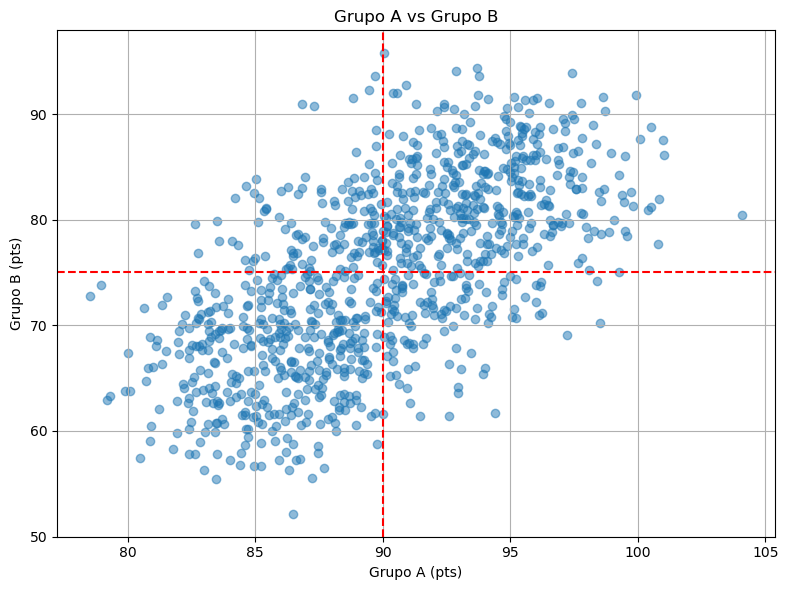

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(grupo_A, grupo_B, alpha=0.5)
plt.axhline(np.mean(grupo_B), color='red', linestyle='--')
plt.axvline(np.mean(grupo_A), color='red', linestyle='--')
plt.title("Grupo A vs Grupo B")
plt.xlabel("Grupo A (pts)")
plt.ylabel("Grupo B (pts)")
plt.grid(True)
plt.tight_layout()
plt.show()